In [1]:

from pandas import Series, DataFrame
from pandas.parser import CParserError

import pandas as pd
pd.__version__

u'0.19.2'

In [2]:
tf = pd.read_csv('TodosFilmesX.csv',sep='\t')

#len(tf)
tf.head()

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,fi,0.823904,Villealfa Filmproduction Oy,Finland,21/10/1988,0,69.0,suomi,Released,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,fi,0.474450,Villealfa Filmproduction Oy,Finland,16/10/1986,0,76.0,English,Released,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,en,1698.000000,Miramax Films,United States of America,25/12/1995,4300000,98.0,English,Released,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,en,1.322870,Universal Pictures,Japan,15/10/1993,12136938,110.0,English,Released,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,en,0.054716,inLoops,Austria,01/01/2006,0,80.0,English,Released,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

In [4]:
#print tf.ix[125]
tamanho1 = len(tf)
tf = tf[ pd.notnull(tf['release_date']) ]
tamanho2 = len(tf)

if (tamanho1-tamanho2)!=0: #drops pre transformaçao numerica
    drops_data = tamanho1-tamanho2;
print('Drops de data iniciais: ',drops_data)

# WARNING: executado apenas uma vez, senao dá erro xxXXXXXXxxxxxxxxxxxxxxXXXXXXXXXXXXXXxxxxxxxxxxxxXXXXxXXXxxxxxXxXxX= WARNING
tf['release_date']=tf['release_date'].str[6:10] 

#==DROPs de datas inválidas============================================================================================
a = pd.to_numeric(tf.release_date,errors='coerce')
#print (tf[pd.to_numeric(tf.release_date, errors='coerce'))
tf.release_date = a

#df = df[np.isfinite(df['EPS'])] #drop row com coluna EP nan
tamanho1 = len(tf)
tf = tf[ pd.notnull(tf['release_date']) ]
tamanho2 = len(tf)

if (tamanho1-tamanho2)!=0: #drops nao numericos
    drops_datanum = tamanho1-tamanho2;
print('Drops de datas nao numericas',drops_datanum)

#==DROP de filmes futuros===============================================================================================

tamanho1 = len(tf)
#df = df.drop(df[df.score < 50].index)
tf = tf.drop(tf[tf.release_date>2017].index)
tamanho2 = len(tf)


if (tamanho1-tamanho2)!=0: #drops nao numericos
    drops_futuros = tamanho1-tamanho2;
print('Drops de filmes futuros',drops_futuros)

#==DROP de filmes com budget,revenue, runtime NULOS=====================================================================
tamanho1 = len(tf)
tf = tf[ pd.notnull(tf['budget']) ]
tf = tf[ pd.notnull(tf['revenue']) ]
tf = tf[ pd.notnull(tf['runtime']) ]
tamanho2 = len(tf)

if (tamanho1-tamanho2)!=0: #drops nao numericos
    drops_bud_rev_time = tamanho1-tamanho2;
print('Drops de budget, revenue, runtime',drops_bud_rev_time)

#==DROP de filmes muito grandes===========================================================================================

tamanho1 = len(tf)
#df = df.drop(df[df.score < 50].index)
tf = tf.drop(tf[tf.runtime>220].index)
tamanho2 = len(tf)


if (tamanho1-tamanho2)!=0: #drops nao numericos
    drops_runtime = tamanho1-tamanho2;
print('Drops de runtime GRANDE',drops_runtime)

#==DROP de filmes velhos====================================================================================================

tamanho1 = len(tf)
#df = df.drop(df[df.score < 50].index)
tf = tf.drop(tf[tf.release_date<1950].index)
tamanho2 = len(tf)


if (tamanho1-tamanho2)!=0: #drops nao numericos
    drops_velhos = tamanho1-tamanho2;
print('Drops de velhos (<1950)',drops_velhos)
#====================================================================================================================
#tf.release_date.max()
maisnovo=tf.release_date.idxmax()
print ('Novo tamanho da tabela:',len(tf))
#print tf[tf.runtime<60].count()
#print tf.ix[maisnovo]

('Drops de data iniciais: ', 24046)
('Drops de datas nao numericas', 1040)
('Drops de filmes futuros', 527)
('Drops de budget, revenue, runtime', 31630)
('Drops de runtime GRANDE', 1960)
('Drops de velhos (<1950)', 29712)
('Novo tamanho da tabela:', 240129)


In [172]:
taux=tf[tf.budget>100000000]
taux

,id,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
17,22,140000000,Adventure|Fantasy|Action,en,28.769026,Walt Disney Pictures,United States of America,2003.0,655011224,143.0,English,Released,Pirates of the Caribbean: The Curse of the Bla...,7.4,6368,2,1,1
30,58,200000000,Adventure|Fantasy|Action,en,10.493411,Walt Disney Pictures,Jamaica,2006.0,1065659812,151.0,English,Released,Pirates of the Caribbean: Dead Man's Chest,6.9,4795,3,4,4
43,74,132000000,Adventure|Thriller|Science Fiction,en,5.685105,Paramount Pictures,United States of America,2005.0,591739379,116.0,English,Released,War of the Worlds,6.1,2098,4,1,1
51,82,135000000,Action|Adventure|Crime|Thriller,en,1.746010,Universal Pictures,Uruguay,2006.0,163794509,134.0,English,Released,Miami Vice,5.7,451,5,4,2
63,95,140000000,Action|Thriller|Science Fiction|Adventure,en,5.552136,Jerry Bruckheimer Films,United States of America,1998.0,553799566,151.0,English,Released,Armageddon,6.4,2314,3,1,2
66,98,103000000,Action|Drama|Adventure,en,7.608045,DreamWorks SKG,United Kingdom,2000.0,457640427,155.0,English,Released,Gladiator,7.8,5061,7,2,1
86,118,150000000,Adventure|Comedy|Family|Fantasy,en,6.227630,Village Roadshow Pictures,Australia,2005.0,474968763,115.0,English,Released,Charlie and the Chocolate Factory,6.6,3184,6,3,1
119,155,185000000,Drama|Action|Crime|Thriller,en,14.074094,DC Comics,United Kingdom,2008.0,1004558444,152.0,English,Released,The Dark Knight,8.2,11168,5,2,2
127,163,110000000,Thriller|Crime,en,4.403013,Village Roadshow Pictures,United States of America,2004.0,362744280,125.0,Français,Released,Ocean's Twelve,6.4,1980,5,1,5
144,180,102000000,Action|Thriller|Science Fiction|Mystery,en,5.505307,DreamWorks SKG,United States of America,2002.0,358372926,145.0,English,Released,Minority Report,7.1,2424,7,1,2


## GRÁFICO SEABORN KDE:
RUNTIME x DATA de Lançamento

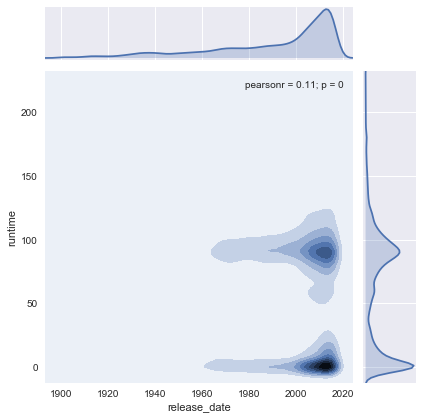

In [118]:

sns.jointplot("release_date", "runtime", tf, kind='kde');


(array([ 1.,  0.,  0.,  1.,  2.,  2.,  5.,  4.,  1.,  4.]),
 array([  15. ,   28.8,   42.6,   56.4,   70.2,   84. ,   97.8,  111.6,
         125.4,  139.2,  153. ]),
 <a list of 10 Patch objects>)

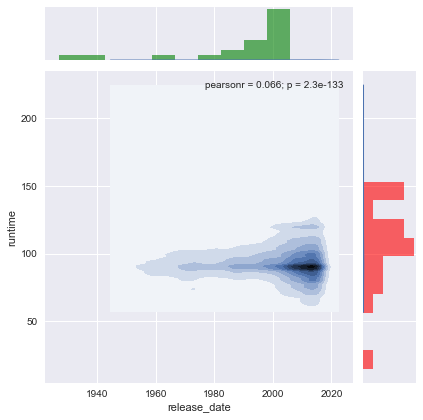

In [157]:
g=sns.jointplot("release_date", "runtime", tf[tf.runtime>60], kind='kde');
g.ax_marg_x.hist(t3.release_date, color="g", alpha=.6) 
g.ax_marg_y.hist(t3.runtime, color="r", alpha=.6, orientation="horizontal")

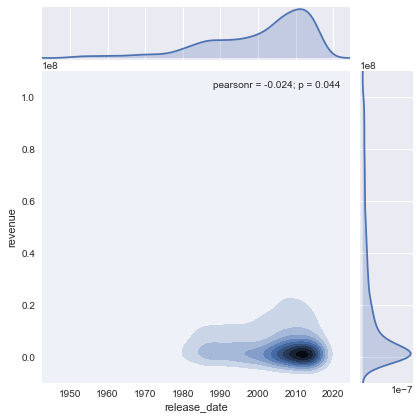

In [174]:
sns.jointplot("release_date", "revenue", tf[(tf.revenue>0) & (tf.revenue<100000000)], kind='kde');

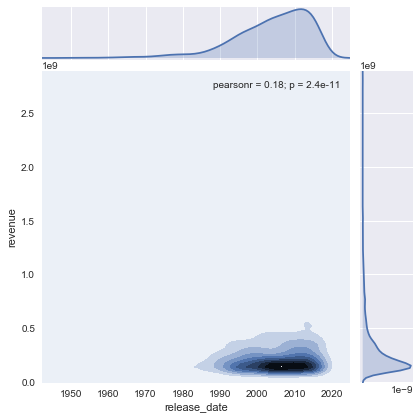

In [175]:
sns.jointplot("release_date", "revenue", tf[tf.revenue>100000000], kind='kde');

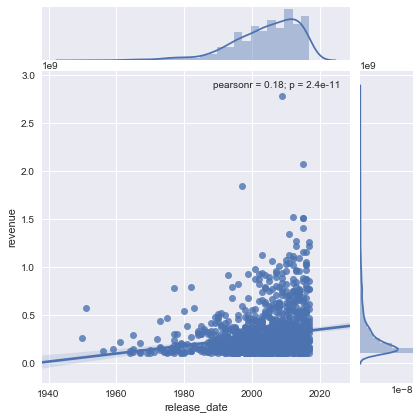

In [176]:
sns.jointplot("release_date", "revenue", tf[tf.revenue>100000000], kind='reg');

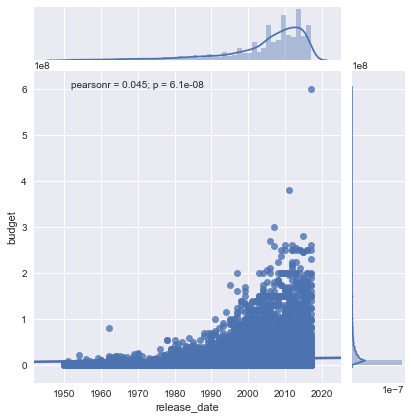

In [167]:
sns.jointplot("release_date", "budget", tf[(tf.budget>0)], kind='reg');

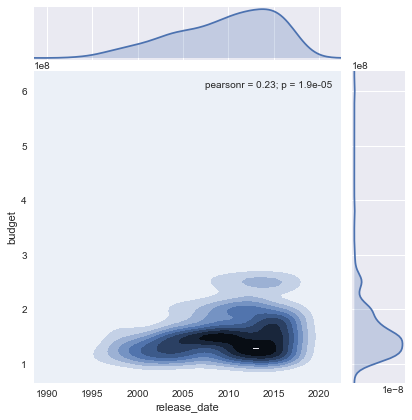

In [173]:
sns.jointplot("release_date", "budget", tf[(tf.budget>100000000)], kind='kde');